# Building A CNN Image Classifier
#### Joshua Greenert
#### DSC550-T301 Data Mining
#### 11/4/2022

In [6]:
# Load the MNIST data set.
from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


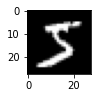

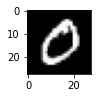

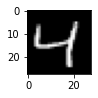

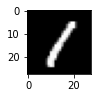

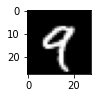

In [14]:
# Display the first five images in the training data set (see section 8.1 in the Machine Learning with Python Cookbook). 
# Compare these to the first five training labels.
from matplotlib import pyplot as plt

# Loop through the images and create a plot from the data.
for i in range(5):  
    plt.subplot(330 + 1 + i)
    plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))
    plt.show()

In [18]:
# Compare the images with the first 5 training labels
train_y[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [3]:
# Build and train a Keras CNN classifier on the MNIST training set.


In [4]:
# Report the test accuracy of your model.


In [5]:
# Display a confusion matrix on the test set classifications.


In [ ]:
#Summarize your results.